# Titanic Dataset Analysis

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.shape

(891, 13)

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Family         891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


# 1.Creating a Family Column in titanic dataset

In [5]:
titanic['Family']=titanic['SibSp']+titanic['Parch']
titanic[['SibSp','Parch','Family']].head()

,SibSp,Parch,Family
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


In [6]:
import seaborn as sns

In [7]:
#conclusion to be drawn:
#Does gender matter
#Age vs survived

In [57]:
t = t[t['Survived']==1]

<h2>Here we are removing all the rows having null value in the age column</h2>
<h3>There are 714 non null rows in age column , so we will work with only those many number of rows</h3>

<h2>This is the histogram showing the number of people survived per age group</h2>

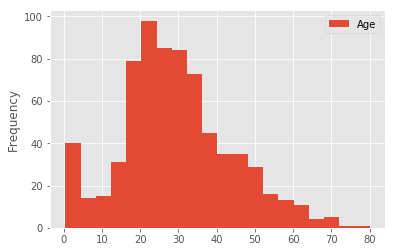

In [35]:
titanic[['Age']].dropna().plot(kind = 'hist',bins =20)

<h1>2.We see the the people from age group of 20 to 25 survived the most (in numbers).
But the problem is that we want to find which age group has the highest chances of survival.
So we need to calculate the percentage of people surviving in each age group</h1>

In [4]:
sv = titanic[['Survived','Age']]
sv =sv.dropna()
sv.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [5]:
sv.shape

(714, 2)

In [8]:

for i  in range(0,90,10):
    non_child = sv[(sv['Age']<=(i+10)) & (sv['Age']>i)]
    non_child['total']=1
    non_child
    print(i,'to',i+10,end='')
    
    print(" ",(non_child['Survived'].sum()/non_child['total'].sum())*100)

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0 to 10  59.375
10 to 20  38.26086956521739
20 to 30  36.52173913043478
30 to 40  44.516129032258064
40 to 50  38.372093023255815
50 to 60  40.476190476190474
60 to 70  23.52941176470588
70 to 80  20.0
80 to 90  nan


C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  


<h2>Conclusion: 
From the above analysis it is clearly visible the percentage of survival is the highest in the age group of 0-10, with apercentage of 59.37%</h2>

<h1>3.Our next analysis is to find which gender has survived more</h1>

In [25]:
t =titanic[['Survived','Age','Sex']]
t.head()

,Survived,Age,Sex
0,0,22.0,male
1,1,38.0,female
2,1,26.0,female
3,1,35.0,female
4,0,35.0,male


<h3> Number of males and females survived</h3>

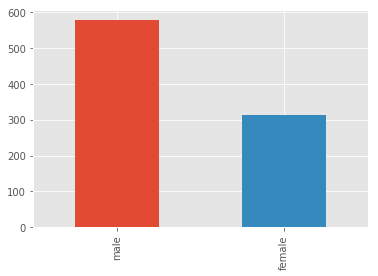

In [36]:
t['Sex'].value_counts().plot(kind ='bar')

<h2>But we need to calculate the percentage of survival of each gender to get a required conclusion</h2>

In [28]:
s = t[['Survived','Sex']]

In [29]:
s['Total']=1
s.head()

,Survived,Sex,Total
0,0,male,1
1,1,female,1
2,1,female,1
3,1,female,1
4,0,male,1


In [30]:
s.groupby('Sex').sum().head()

,Survived,Total
Sex,,
female,233,314
male,109,577


In [31]:
percent_female = (233/314)*100
percent_female

74.20382165605095

In [33]:
 percent_male=(109/577)*100
percent_male

18.890814558058924

## Conclusion: Percentage of female survived = 74% which is way higher than the percentage of male survived which is only  = 18.89%